In [9]:
!pip install ipython


In [3]:
import IPython
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import display, update_display, HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [34]:
class_names = list(train_generator.class_indices.keys())
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [5]:
IMAGE_SIZE = 256
CHANNELS = 3
 train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)


Found 2930 images belonging to 4 classes.


In [6]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.25044236 0.372011   0.13671686]
  [0.27265435 0.39102355 0.1557294 ]
  [0.32574153 0.4433886  0.2080945 ]
  ...
  [0.50531995 0.650418   0.48179054]
  [0.5017489  0.64684695 0.4782195 ]
  [0.4981779  0.6432759  0.47464848]]

 [[0.25341824 0.37498686 0.13969271]
  [0.267893   0.38685733 0.15156321]
  [0.31681398 0.43446106 0.19916691]
  ...
  [0.52425414 0.6693522  0.5007247 ]
  [0.53318167 0.6782797  0.50965226]
  [0.54210925 0.6872073  0.51857984]]

 [[0.2563941  0.3779627  0.14266856]
  [0.26313162 0.38269114 0.14739701]
  [0.30788642 0.42553347 0.19023935]
  ...
  [0.6000693  0.7451673  0.5765399 ]
  [0.61435336 0.7594514  0.59082395]
  [0.62863743 0.77373546 0.605108  ]]

 ...

 [[0.2997419  0.43307525 0.2369968 ]
  [0.29498053 0.42831388 0.23223543]
  [0.29021916 0.4235525  0.22747408]
  ...
  [0.47655427 0.57851505 0.46478957]
  [0.5037567  0.6114549  0.49390444]
  [0.6089603  0.7226858  0.60111713]]

 [[0.27739835 0.41289806 0.21537536]
  [0.27977905 0.41706428 0.21835123]


In [7]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 417 images belonging to 4 classes.


In [8]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 841 images belonging to 4 classes.


In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS) 
n_classes = 4
model = models.Sequential([
     layers.InputLayer(input_shape=input_shape),
     layers.Conv2D(32, (3,3),  activation='relu', input_shape = input_shape),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, kernel_size = (3,3),  activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, kernel_size = (3,3),  activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
    
]) 
 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric


In [ ]:

model.compile(
optimizer='adam',
loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [4]:

11/32


0.34375

In [3]:
2930/32 

91.5625

In [13]:
417/32

13.03125

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=92,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=13,
    verbose=1,
    epochs=20
)

Epoch 1/20
92/92 [==============================] - 239s 3s/step - loss: 0.1764 - accuracy: 0.9290 - val_loss: 0.2190 - val_accuracy: 0.8942
Epoch 2/20
92/92 [==============================] - 214s 2s/step - loss: 0.1780 - accuracy: 0.9287 - val_loss: 0.2014 - val_accuracy: 0.9279
Epoch 3/20
92/92 [==============================] - 168s 2s/step - loss: 0.1914 - accuracy: 0.9218 - val_loss: 0.2006 - val_accuracy: 0.9062
Epoch 4/20
92/92 [==============================] - 169s 2s/step - loss: 0.1851 - accuracy: 0.9276 - val_loss: 0.1968 - val_accuracy: 0.9303
Epoch 5/20
92/92 [==============================] - 169s 2s/step - loss: 0.2215 - accuracy: 0.9184 - val_loss: 0.2771 - val_accuracy: 0.8918
Epoch 6/20
92/92 [==============================] - 173s 2s/step - loss: 0.1904 - accuracy: 0.9273 - val_loss: 0.2875 - val_accuracy: 0.9038
Epoch 7/20
92/92 [==============================] - 175s 2s/step - loss: 0.2486 - accuracy: 0.9007 - val_loss: 0.3181 - val_accuracy: 0.8678
Epoch 8/20
92

In [22]:
scores = model.evaluate(test_generator)

27/27 [==============================] - 22s 828ms/step - loss: 0.4540 - accuracy: 0.9013


In [23]:
scores

[0.4539848566055298, 0.9013079404830933]

In [24]:
history

In [25]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 92}

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
type(history.history['loss'])

list

In [28]:
len(history.history['loss'])

20

In [29]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.17641833424568176,
 0.1780349612236023,
 0.19135868549346924,
 0.18507203459739685,
 0.22149060666561127]

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

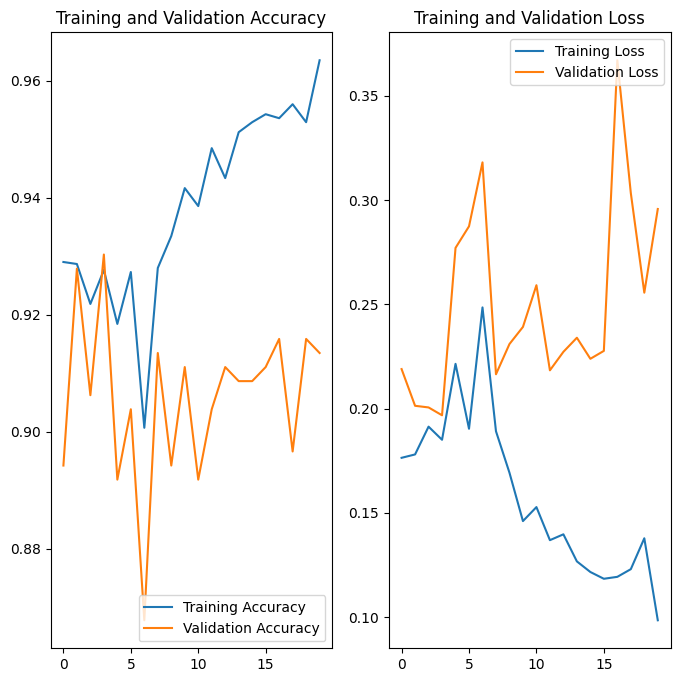

In [31]:
EPOCHS = 100

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Common_Rust
1/1 [==============================] - 1s 559ms/step
predicted label: Common_Rust


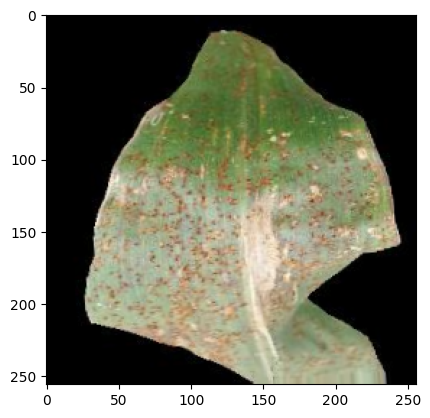

In [36]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 52ms/step


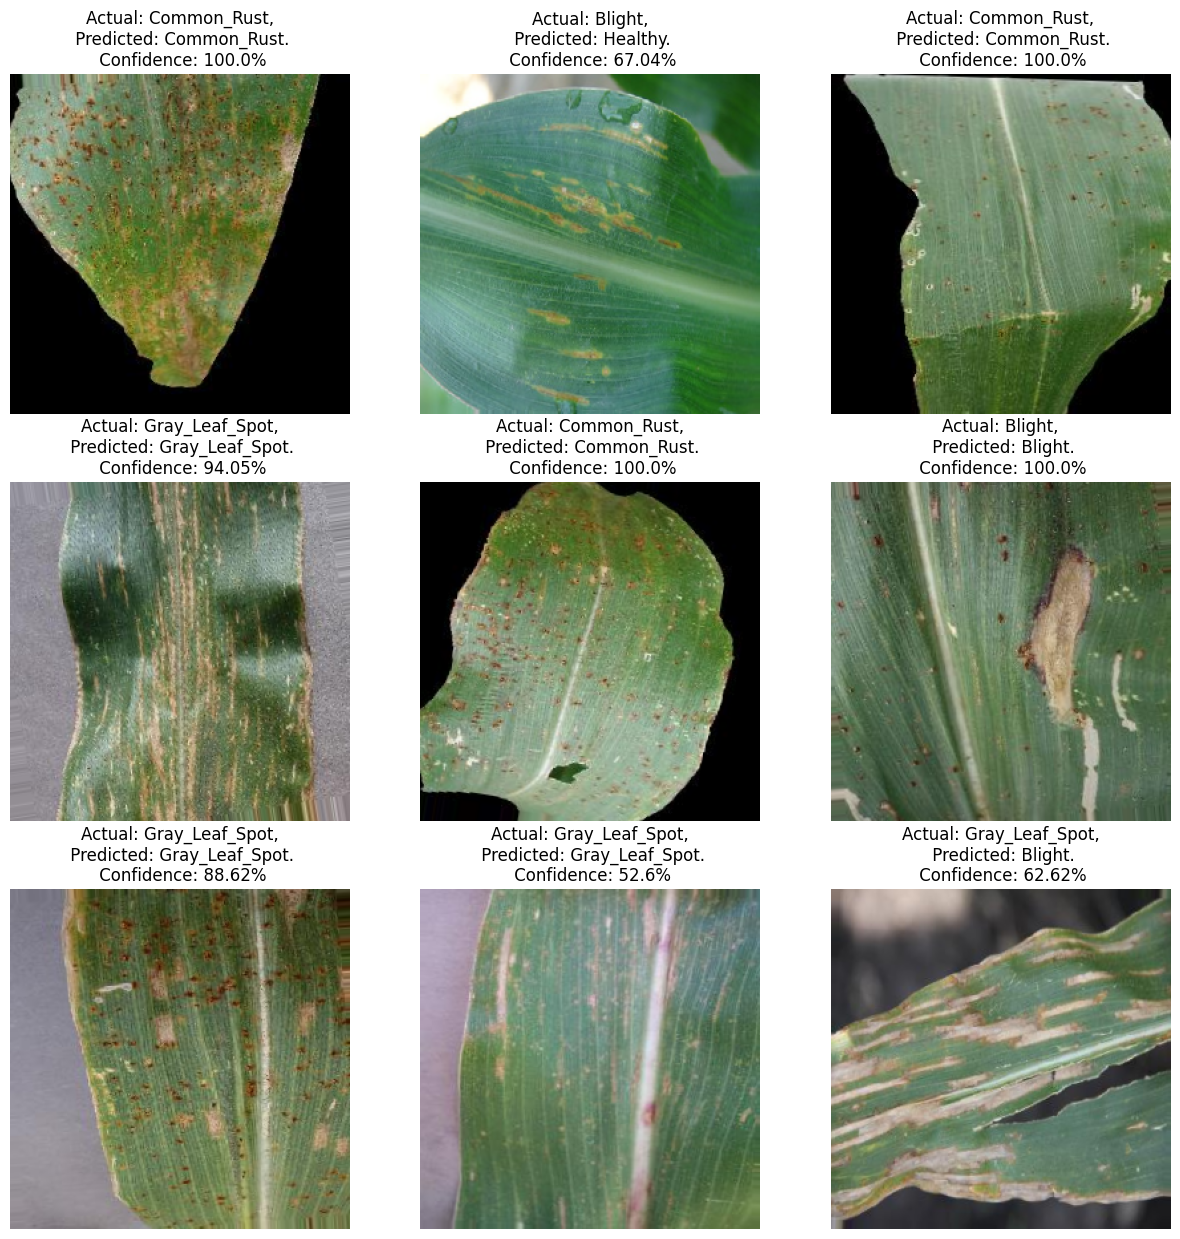

In [38]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [40]:
model.save("../maizes.h5")